In [1]:
import os, sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

data_DIR = "../data/injuries/"
fig_DIR = "../figs/analysis/"

In [2]:
df = pd.read_parquet(data_DIR + "all_trades.parquet")
df=df[~df.duplicated(keep='last')].reset_index(drop=True)

In [3]:
df[df[["Date","Team","Acquired","Relinquished","Notes"]].duplicated()]

,Date,Team,Acquired,Relinquished,Notes


In [4]:
df.query("Team == 'Pelicans' & Date>='2025-01-31'")["Relinquished"].iloc[0]

'Daniel Theis • 2031 second round pick (least favorable of Magic, Pelicans picks) (?-?)'

## Process Data

In [5]:
df["Team"] = df["Team"].str.replace("Clippets","Clippers")
df["Team"] = df["Team"].str.replace("Grizzles","Grizzlies")
df["Team"] = df["Team"].str.replace("Lakerse","Lakers")
df["Notes"] = df["Notes"].str.replace("Clippets","Clippers")
df["Notes"] = df["Notes"].str.replace("Grizzles","Grizzlies")
df["Notes"] = df["Notes"].str.replace("Lakerse","Lakers")
df = df[~(df["Notes"].str.contains("void"))]

In [6]:
df1 = df[df["Notes"].str.contains("trade")]
df1 = df1[df1["Date"] >= "2015-07-01"].reset_index(drop=True)
df1["tradetype"] = df1["Notes"].str.split(' ').str[0]
df1 = df1[~(df1["tradetype"] == "earlier")].reset_index(drop=True)
df1 = df1.rename(columns={"Team":"Team1"})

In [7]:
df1["tradetype"].unique()

array(['trade', '3-team', '4-team', '5-team', '6-team'], dtype=object)

In [8]:
df1_1 = df1[df1["tradetype"] == "trade"].reset_index(drop=True)
df1_1["Team2"] = df1_1["Notes"].str.split(' ').str[-1]
df1_1.insert(2,"Team2",df1_1.pop("Team2"))
df2_1 = df1_1.copy()

In [9]:
df1_2 = df1[df1["tradetype"] == "3-team"].reset_index(drop=True)
df1_2["Team2"] = df1_2["Notes"].str.split(' ').str[-2]
df1_2["Team3"] = df1_2["Notes"].str.split(' ').str[-1]
df1_2.insert(2,"Team2",df1_2.pop("Team2"))
df1_2.insert(3,"Team3",df1_2.pop("Team3"))
df1_2["Team2"] = df1_2["Team2"].str.replace(",","")
df2_21 = df1_2.drop(columns= "Team3")
df2_22 = df1_2.drop(columns= "Team2")
df2_22 = df2_22.rename(columns={"Team3":"Team2"})
df2_2 = pd.concat([df2_21,df2_22]).sort_values(["Date","Team1"]).reset_index(drop=True)

In [10]:
df1_3 = df1[df1["tradetype"] == "4-team"].reset_index(drop=True)
df1_3["Team2"] = df1_3["Notes"].str.split(' ').str[-3]
df1_3["Team3"] = df1_3["Notes"].str.split(' ').str[-2]
df1_3["Team4"] = df1_3["Notes"].str.split(' ').str[-1]
df1_3.insert(2,"Team2",df1_3.pop("Team2"))
df1_3.insert(3,"Team3",df1_3.pop("Team3"))
df1_3.insert(4,"Team4",df1_3.pop("Team4"))
df1_3["Team2"] = df1_3["Team2"].str.replace(",","")
df1_3["Team3"] = df1_3["Team3"].str.replace(",","")
df2_31 = df1_3.drop(columns= ["Team3","Team4"])
df2_32 = df1_3.drop(columns= ["Team2","Team4"])
df2_33 = df1_3.drop(columns= ["Team2","Team3"])
df2_32 = df2_32.rename(columns={"Team3":"Team2"})
df2_33 = df2_33.rename(columns={"Team4":"Team2"})
df2_3 = pd.concat([df2_31,df2_32,df2_33]).sort_values(["Date","Team1"]).reset_index(drop=True)

In [11]:
df1_4 = df1[df1["tradetype"] == "5-team"].reset_index(drop=True)
df1_4["Team2"] = df1_4["Notes"].str.split(' ').str[-4]
df1_4["Team3"] = df1_4["Notes"].str.split(' ').str[-3]
df1_4["Team4"] = df1_4["Notes"].str.split(' ').str[-2]
df1_4["Team5"] = df1_4["Notes"].str.split(' ').str[-1]
df1_4.insert(2,"Team2",df1_4.pop("Team2"))
df1_4.insert(3,"Team3",df1_4.pop("Team3"))
df1_4.insert(4,"Team4",df1_4.pop("Team4"))
df1_4.insert(5,"Team5",df1_4.pop("Team5"))
df1_4["Team2"] = df1_4["Team2"].str.replace(",","")
df1_4["Team3"] = df1_4["Team3"].str.replace(",","")
df1_4["Team4"] = df1_4["Team4"].str.replace(",","")
df2_41 = df1_4.drop(columns= ["Team3","Team4","Team5"])
df2_42 = df1_4.drop(columns= ["Team2","Team4","Team5"])
df2_43 = df1_4.drop(columns= ["Team2","Team3","Team5"])
df2_44 = df1_4.drop(columns= ["Team2","Team3","Team4"])
df2_42 = df2_42.rename(columns={"Team3":"Team2"})
df2_43 = df2_43.rename(columns={"Team4":"Team2"})
df2_44 = df2_44.rename(columns={"Team5":"Team2"})
df2_4 = pd.concat([df2_41,df2_42,df2_43,df2_44]).sort_values(["Date","Team1"]).reset_index(drop=True)

In [12]:
df1_5 = df1[df1["tradetype"] == "6-team"].reset_index(drop=True)
df1_5["Team2"] = df1_5["Notes"].str.split(' ').str[-5]
df1_5["Team3"] = df1_5["Notes"].str.split(' ').str[-4]
df1_5["Team4"] = df1_5["Notes"].str.split(' ').str[-3]
df1_5["Team5"] = df1_5["Notes"].str.split(' ').str[-2]
df1_5["Team6"] = df1_5["Notes"].str.split(' ').str[-1]
df1_5.insert(2,"Team2",df1_5.pop("Team2"))
df1_5.insert(3,"Team3",df1_5.pop("Team3"))
df1_5.insert(4,"Team4",df1_5.pop("Team4"))
df1_5.insert(5,"Team5",df1_5.pop("Team5"))
df1_5.insert(6,"Team6",df1_5.pop("Team6"))
df1_5["Team2"] = df1_5["Team2"].str.replace(",","")
df1_5["Team3"] = df1_5["Team3"].str.replace(",","")
df1_5["Team4"] = df1_5["Team4"].str.replace(",","")
df1_5["Team5"] = df1_5["Team5"].str.replace(",","")

In [13]:
df2_51 = df1_5.drop(columns= ["Team3","Team4","Team5","Team6"])
df2_52 = df1_5.drop(columns= ["Team2","Team4","Team5","Team6"])
df2_53 = df1_5.drop(columns= ["Team2","Team3","Team5","Team6"])
df2_54 = df1_5.drop(columns= ["Team2","Team3","Team4","Team6"])
df2_55 = df1_5.drop(columns= ["Team2","Team3","Team4","Team5"])
df2_52 = df2_52.rename(columns={"Team3":"Team2"})
df2_53 = df2_53.rename(columns={"Team4":"Team2"})
df2_54 = df2_54.rename(columns={"Team5":"Team2"})
df2_55 = df2_55.rename(columns={"Team6":"Team2"})
df2_5 = pd.concat([df2_51,df2_52,df2_53,df2_54,df2_55]).sort_values(["Date","Team1"]).reset_index(drop=True)

In [14]:
df2 = pd.concat([df2_1,df2_2,df2_3,df2_4,df2_5]).sort_values(["Date","Team1"]).reset_index(drop=True)
teams = df2["Team1"].unique()
teams = np.concatenate([teams,["sum"]])
teams.sort()
df2["Team1"] = pd.Categorical(df2["Team1"],categories=teams)
df2["Team2"] = pd.Categorical(df2["Team2"],categories=teams)

## Deadlines

In [15]:
#season start
deadlines_0 = ["2019-10-22","2020-12-22","2021-10-19","2022-10-18","2023-10-24","2024-10-22"]
#1 week before trade deadline
deadlines_1 = ["2020-01-31","2021-03-19","2022-02-04","2023-02-03","2024-02-02","2025-01-31"]
#two days before trade deadline
deadlines_2 = ["2020-02-04","2021-03-23","2022-02-08","2023-02-07","2024-02-06","2025-02-04"]
#trade deadline
deadlines_3 = ["2020-02-06","2021-03-25","2022-02-10","2023-02-09","2024-02-08","2025-02-06"]

In [16]:
df

,Date,Team,Acquired,Relinquished,Notes
0,1996-07-01,76ers,None,Derrick Alston (Sr.),player became a free agent
1,1996-07-01,Bucks,None,Lee Mayberry,player became a free agent (date approximate)
2,1996-07-01,Bullets,None,Jim McIlvaine,player became a free agent (date approximate)
3,1996-07-01,Cavaliers,None,Michael Cage,player became a free agent
4,1996-07-01,Celtics,K.C. Jones,None,hired as assistant coach
...,...,...,...,...,...
37106,2025-02-08,Wizards,Jaylen Nowell,None,signed free agent to a 10-day contract
37107,2025-02-09,76ers,David Roddy,None,signed free agent to a 10-day contract
37108,2025-02-09,Hornets,Moussa Diabate,None,re-signed to a 3-year rest-of-season contract
37109,2025-02-09,Spurs,Bismack Biyombo,None,signed free agent to a 10-day contract


In [17]:
seasons = np.arange(2020,2026)
dfa = []
for ii, season in enumerate(seasons):
    s = df2.query(f"Date>='{deadlines_1[ii]}'").query(f"Date<='{deadlines_3[ii]}'")["tradetype"].value_counts()
    df3 = pd.DataFrame(s)
    df3["mul"] = 0
    df3.loc["trade","mul"] = 2
    df3.loc["3-team","mul"] = 3
    df3.loc["4-team","mul"] = 4
    df3.loc["5-team","mul"] = 5
    df3.loc["6-team","mul"] = 6
    df3["mul"] = df3["mul"].astype(int)
    df3 = df3.fillna(0)
    df3["trades"] = df3["count"]/df3["mul"]
    df3["trades"] = df3["trades"].astype(int)
    df3.loc["sum"] = df3.sum()
    df3["season"] = season
    dfa.append(df3)
df4 = pd.concat(dfa)
df5 = df4.loc["sum"]
df5 = df5.reset_index()

### Trades During Deadline Week

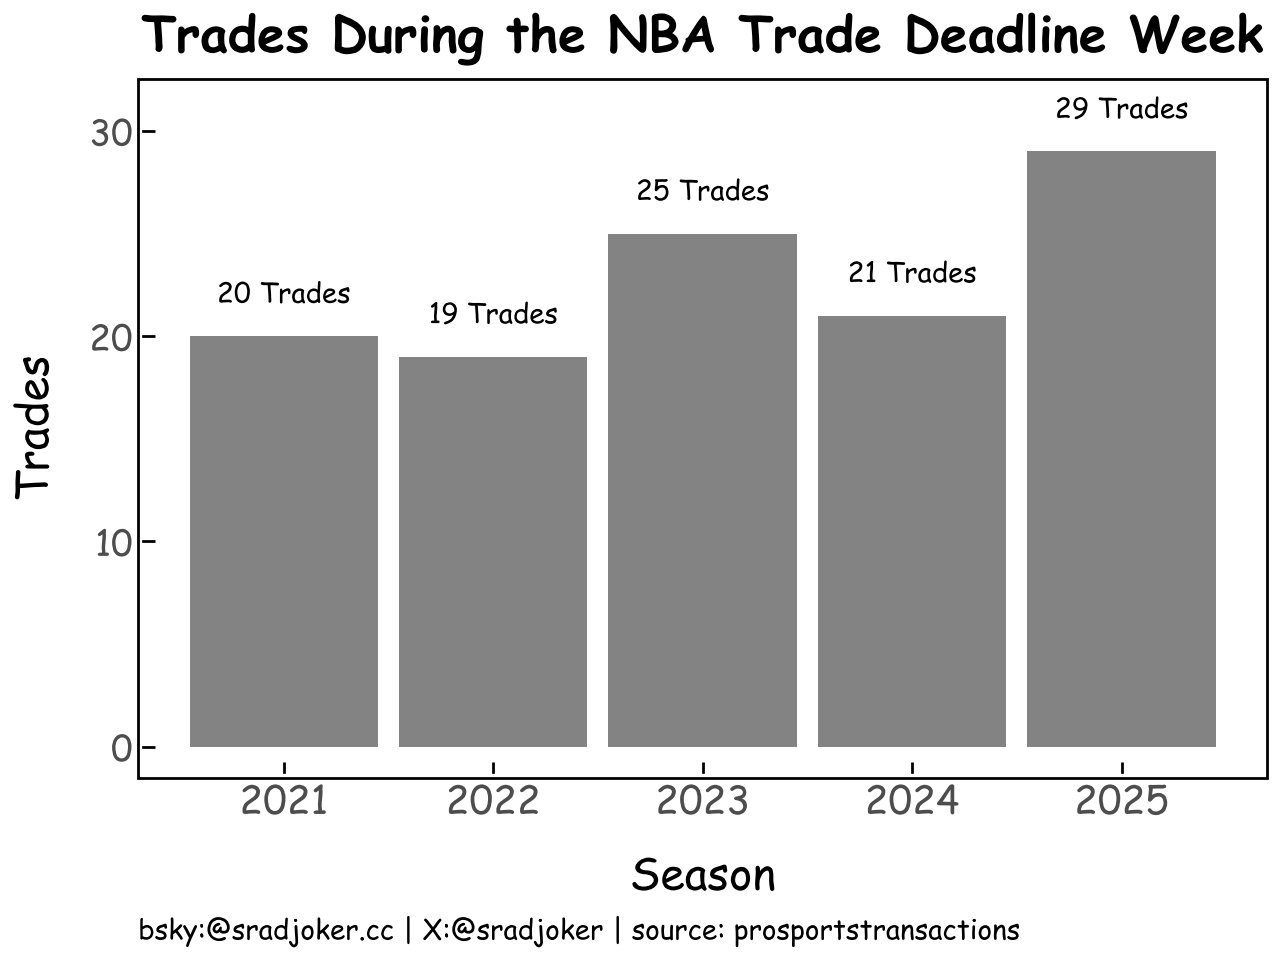

In [18]:
dfp = df5.copy()
dfp = dfp.query("season > 2020")
p = (
    ggplot(dfp)
    + aes(x="season",y="trades")
    + geom_bar(stat="identity", alpha=0.75)
    + theme_idv
    + geom_text(aes(label = "trades", y="trades"),size=10,nudge_y=+2,format_string ="{:0.0f} Trades")
    + scale_x_continuous(breaks=seasons)
    + labs(
        title = "Trades During the NBA Trade Deadline Week",
        caption = "bsky:@sradjoker.cc | X:@sradjoker | source: prosportstransactions",
        x = "Season",
        y = "Trades"
    )
    + theme(
        plot_title=element_text(face="bold", size=18),
        axis_text_x=element_text(size=14)
    )
)
# p.save(fig_DIR + "NBA_Trade_Deadline.png",dpi=300,verbose=False)
p

In [19]:
seasons = np.arange(2020,2026)
dfa = []
for ii, season in enumerate(seasons):
    s = df2.query(f"Date>'{deadlines_2[ii]}'").query(f"Date<='{deadlines_3[ii]}'")["tradetype"].value_counts()
    df6 = pd.DataFrame(s)
    df6["mul"] = 0
    df6.loc["trade","mul"] = 2
    df6.loc["3-team","mul"] = 3
    df6.loc["4-team","mul"] = 4
    df6.loc["5-team","mul"] = 5
    df6.loc["6-team","mul"] = 6
    df6["mul"] = df6["mul"].astype(int)
    df6 = df6.fillna(0)
    df6["trades"] = df6["count"]/df6["mul"]
    df6["trades"] = df6["trades"].astype(int)
    df6.loc["sum"] = df6.sum()
    df6["season"] = season
    dfa.append(df6)
df7 = pd.concat(dfa)
df8 = df7.loc["sum"]
df8 = df8.reset_index()

### Trades During Deadline Day

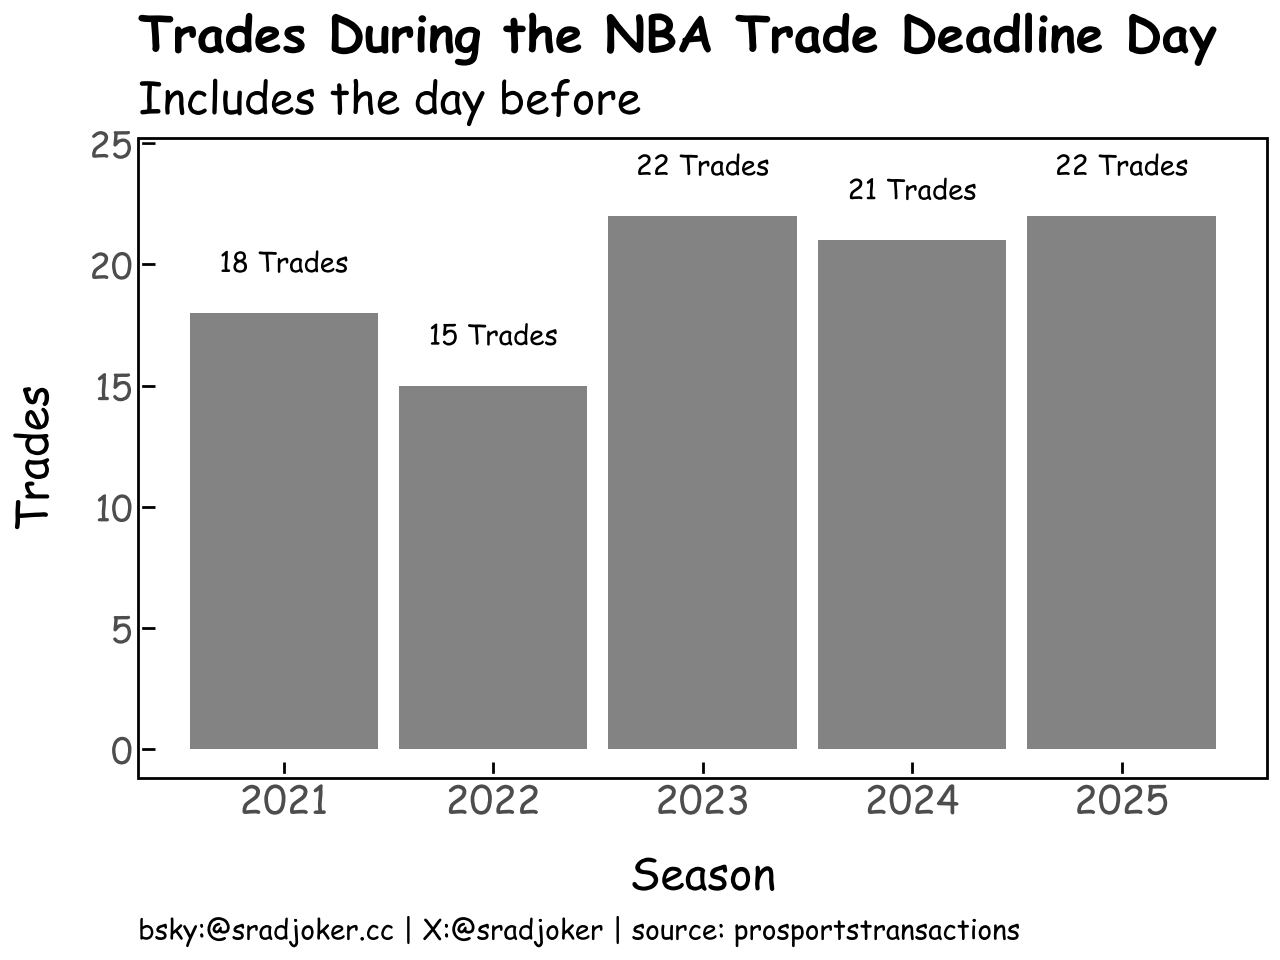

In [20]:
dfp = df8.copy()
dfp = dfp.query("season > 2020")
p = (
    ggplot(dfp)
    + aes(x="season",y="trades")
    + geom_bar(stat="identity", alpha=0.75)
    + theme_idv
    + geom_text(aes(label = "trades", y="trades"),size=10,nudge_y=+2,format_string ="{:0.0f} Trades")
    + scale_x_continuous(breaks=seasons)
    + labs(
        title = "Trades During the NBA Trade Deadline Day",
        subtitle = "Includes the day before",
        caption = "bsky:@sradjoker.cc | X:@sradjoker | source: prosportstransactions",
        x = "Season",
        y = "Trades"
    )
    + theme(
        plot_title=element_text(face="bold", size=18),
        axis_text_x=element_text(size=14)
    )
)
# p.save(fig_DIR + "NBA_Trade_Deadline.png",dpi=300,verbose=False)
p

### Most Active Teams

In [21]:
df10_1 = df2.drop(columns="Team2").rename(columns={"Team1":"Team"})
df10_2 = df2.drop(columns="Team1").rename(columns={"Team2":"Team"})
df10 = pd.concat([df10_1,df10_2])
df10 = df10.sort_values(["Date","Team","tradetype"]).reset_index(drop=True)

In [22]:
ii = 5
df11 = df10.query(f"Date>='{deadlines_1[ii]}'").query(f"Date<='{deadlines_3[ii]}'")
df11.query("Team == 'Pelicans'")

,Date,Team,Acquired,Relinquished,Notes,tradetype
2800,2025-02-05,Pelicans,cash considerations,Daniel Theis • 2031 second round pick (least f...,trade with Thunder,trade
2801,2025-02-05,Pelicans,Daniel Theis • 2031 second round pick (least f...,cash considerations,trade with Pelicans,trade
2870,2025-02-06,Pelicans,Bruce Brown • Kelly Olynyk • 2026 first round ...,Brandon Ingram,trade with Raptors,trade
2871,2025-02-06,Pelicans,Brandon Ingram,Bruce Brown • Kelly Olynyk • 2026 first round ...,trade with Pelicans,trade


In [23]:
seasons = np.arange(2020,2026)
dfb = []
for ii, season in enumerate(seasons):
    df11 = df10.query(f"Date>='{deadlines_1[ii]}'").query(f"Date<='{deadlines_3[ii]}'")
    df12 = df11.groupby(["Team","tradetype"])[["tradetype"]].value_counts()
    df12 = pd.DataFrame(df12)
    df12 = df12.reset_index()
    df12["mul"] = 0
    df12.loc[df12["tradetype"] == "trade","mul"] = 2
    df12.loc[df12["tradetype"] == "3-team","mul"] = 3
    df12.loc[df12["tradetype"] == "4-team","mul"] = 4
    df12.loc[df12["tradetype"] == "5-team","mul"] = 5
    df12.loc[df12["tradetype"] == "6-team","mul"] = 6
    df12["mul"] = df12["mul"].astype(int)
    df12["trades"] = df12["count"]/df12["mul"]
    df12["trades"] = df12["trades"].astype(int)
    df12["season"] = season
    df13 = df12.groupby(["Team"])[["trades"]].sum()
    df13 = df13.reset_index()
    df13["season"] = season
    dfb.append(df13)
df14 = pd.concat(dfb)

In [ ]:
# df15 = df14.query("trades > 0")
df15 = df14.copy()
df15 = df15.rename(columns={"Team":"team_slug"})
# df15["team_slug"] = df15["Team"]
df15 = add_tinfo(df15,on="team_slug")
# df15["image"] = df15["image"].str.replace("Documents","")

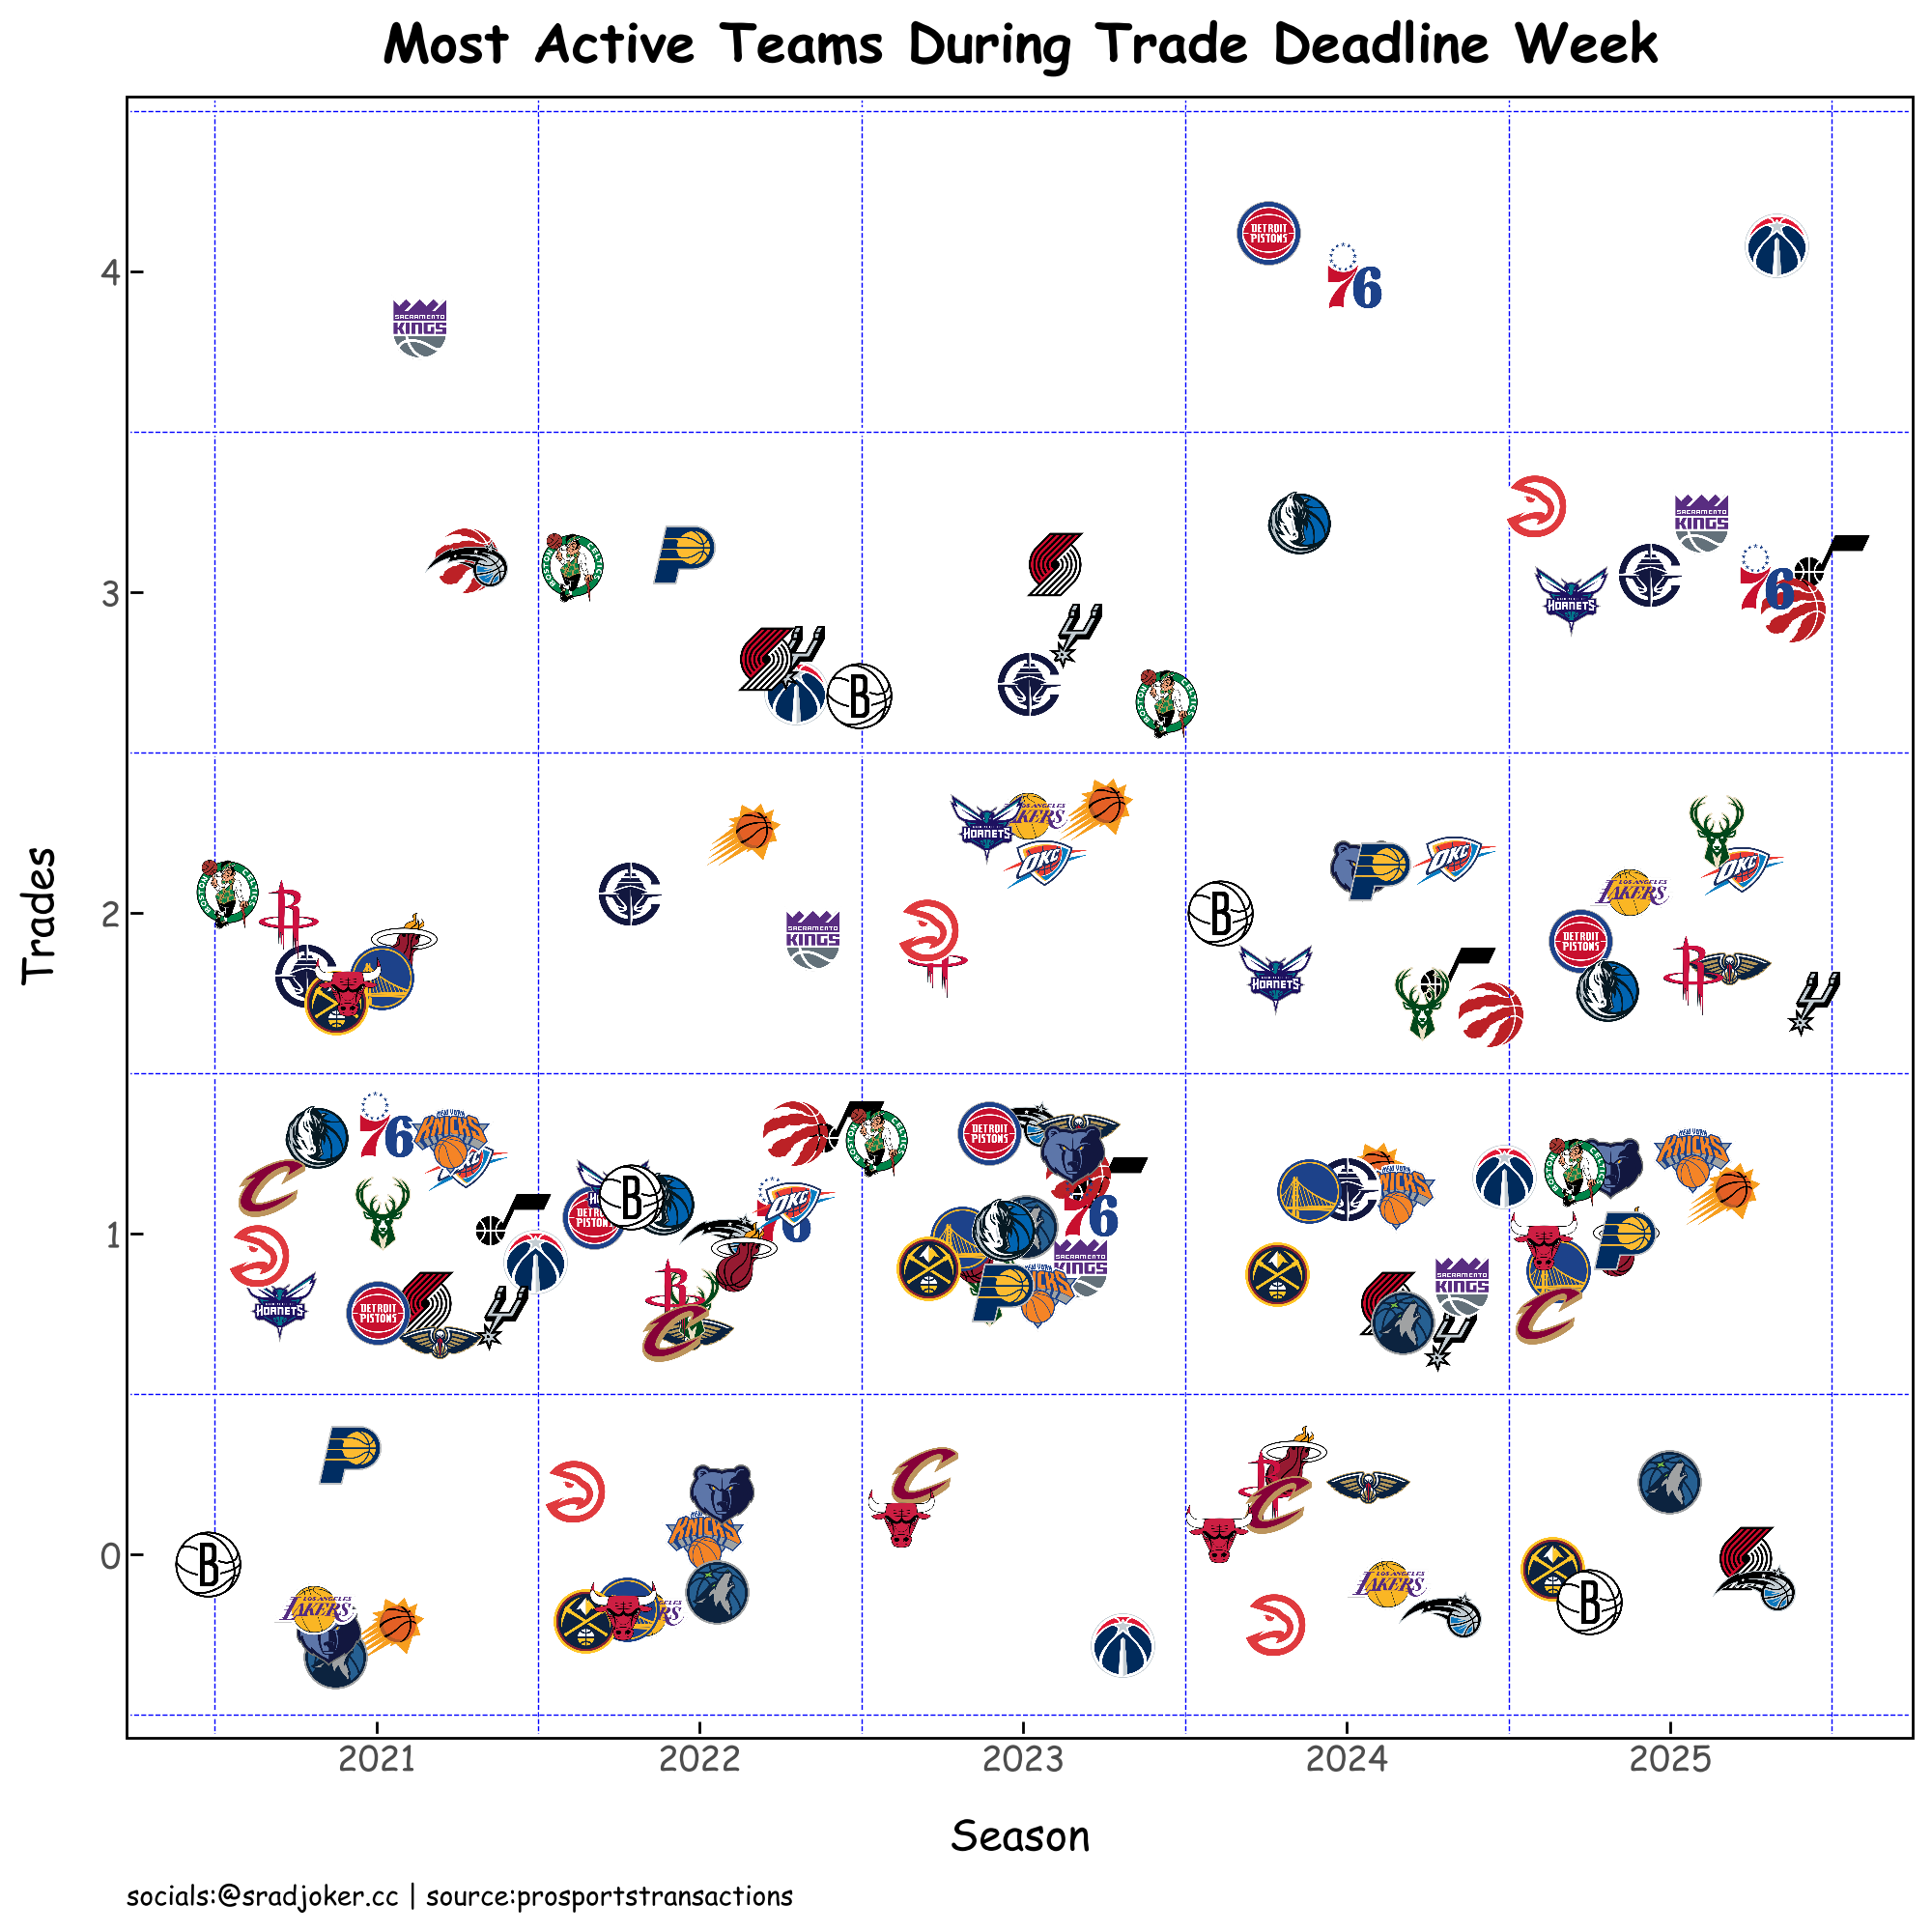

In [32]:
dfp = df15.copy()
dfp = dfp.query("season > 2020")
p = (
    ggplot(dfp)
    + aes(x="season",y="trades",label="Team",image="image",fill="Team")
    # + geom_jitter(position=position_jitter(width=0.2, height=0.2, random_state = 1))
    # + geom_point()
    # + geom_image(position=position_jitter(width=0.25, height=0.25),size=0.07)
    + geom_image(position=position_jitterdodge(jitter_height=0.35,dodge_width=0.8),size=0.08)
    + scale_x_continuous(breaks=seasons)
    + theme_idv
    + theme(
        figure_size=(10,10),
        panel_grid_minor=element_line(color="blue",linetype="dashed",size=0.5)
    )
    + labs(
        title="Most Active Teams During Trade Deadline Week",
        x="Season",
        y="Trades",
        caption="socials:@sradjoker.cc | source:prosportstransactions"
    )
)
p